In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta # 시간 데이터 처리

In [4]:
train = pd.read_csv("data/train.csv", sep = ',')
submission = pd.read_csv("data/submission.csv")

In [5]:
# object 타입의 'Time'열을 datetime 타입으로 변환
train['Time'] = pd.to_datetime(train.Time)

# 'Time'열을 데이터프레임의 인덱스로 설정
train = train.set_index('Time')

In [6]:
# index에서 month, date, hour을 각각 뽑아내어 새로운 칼럼으로 설정
train['month'] = train.index.month
train['date'] = train.index.day
train['hour'] = train.index.hour
train['day'] = train.index.dayofweek  # 0:Monday ~ 6:Sudnay

In [7]:
train.head()

,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,X1047,...,X767,X1271,X1288,X58,X1033,X1163,month,date,hour,day
Time,,,,,,,,,,,,,,,,,,,,,
2016-07-26 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,26,11,1
2016-07-26 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,26,12,1
2016-07-26 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,26,13,1
2016-07-26 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,26,14,1
2016-07-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,26,15,1


In [16]:
train = train.dropna(how='all',axis=1)

In [17]:
# 0~6까지의 요일에서 각각 시간별 mean
dh_mean = train.groupby(['day','hour']).mean()

# c = 미터ID리스트 (즉 위 데이터프레임의 칼럼 level) (후에 for loop에서 사용하기 위해)
c = dh_mean.columns

dh_mean.loc[(2, ),c[0]]  # 07/26/2016 은 화요일(2)

hour
0     0.285889
1     0.288211
2     0.282789
3     0.302526
4     0.292667
5     0.291632
6     0.462316
7     0.512947
8     0.369333
9     0.296053
10    0.346368
11    0.406000
12    0.360833
13    0.340895
14    0.325263
15    0.376053
16    0.362111
17    0.407211
18    0.485158
19    0.534056
20    0.477000
21    0.395368
22    0.340895
23    0.319353
Name: X692, dtype: float64

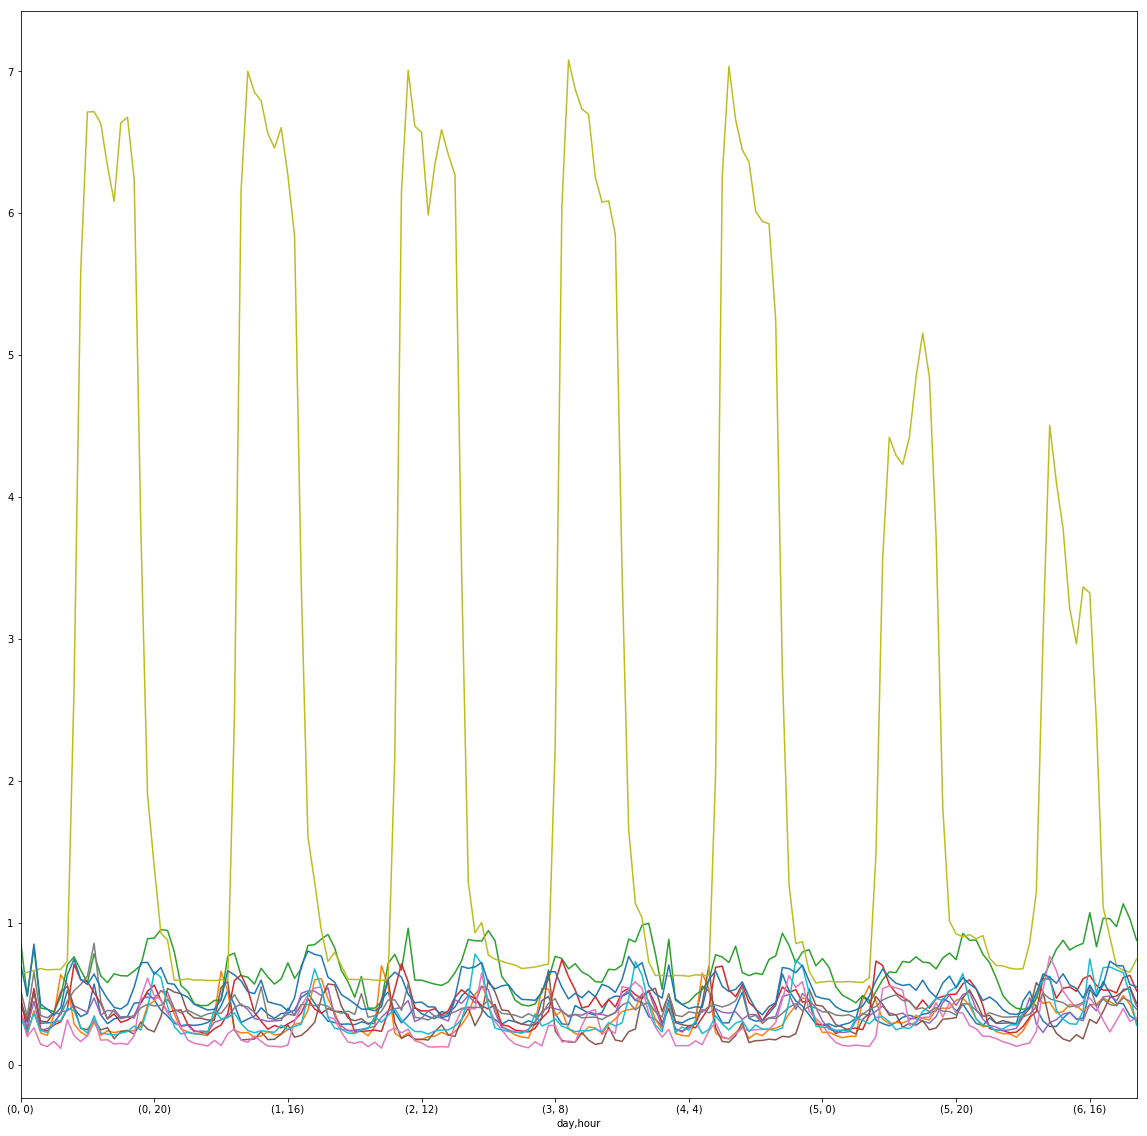

In [20]:
# 요일별로 시간별 평균에 차이가 있는지 대략적으로 파악(시각화)
dh_mean.iloc[:,[0,120,240, 260,480,600,720,840,960,1080,1200]].plot(figsize=(20,20), legend=None)

In [21]:
# NaN 값인 셀들에 해당 미터ID의 시간별 평균 대입

train2 = pd.DataFrame()   # 새로운 데이터프레임 생성
n=0  # 현재 칼럼카운트를 보여주기 위한 변수

# 미터ID 리스트 c에서 1개씩 for loop
for i in c:  
    n +=1   # 카운트 
    li = train[train[i].isnull()].index   # li: train데이터프레임의 특정 열(i)에서 Null인 셀 index추출 
    df = pd.DataFrame(train[i])    # df: train의 i열을 별개 데이터프레임으로 생성

    print("%d. current column: %s, NaN count: %d" %(n, i, len(li)))   
    for t in li:    #  li(Null 인덱스)를 사용해 for loop
        day = t.dayofweek
        hour = t.hour
        df.loc[t] = dh_mean.loc[(day, hour),i]  # null값에 평균 대입
    train2 = pd.concat([train2,df], axis=1)   # 평균 대치가 끝난 df를 train2에 concat해준다. 

1. current column: X692, NaN count: 13845
2. current column: X1272, NaN count: 13844
3. current column: X553, NaN count: 13868
4. current column: X1299, NaN count: 13903
5. current column: X598, NaN count: 13868
6. current column: X1003, NaN count: 13972
7. current column: X1010, NaN count: 13861
8. current column: X1216, NaN count: 13845
9. current column: X1047, NaN count: 13847
10. current column: X381, NaN count: 10172
11. current column: X466, NaN count: 10294
12. current column: X1420, NaN count: 13844
13. current column: X686, NaN count: 13844
14. current column: X711, NaN count: 13841
15. current column: X1251, NaN count: 13845
16. current column: X828, NaN count: 13845
17. current column: X1350, NaN count: 13903
18. current column: X1066, NaN count: 13848
19. current column: X1293, NaN count: 13876
20. current column: X1148, NaN count: 13868
21. current column: X451, NaN count: 10147
22. current column: X174, NaN count: 10270
23. current column: X74, NaN count: 13693
24. curre

189. current column: X1253, NaN count: 13844
190. current column: X1383, NaN count: 13874
191. current column: X860, NaN count: 13845
192. current column: X295, NaN count: 10124
193. current column: X1031, NaN count: 13845
194. current column: X1232, NaN count: 13844
195. current column: X258, NaN count: 10058
196. current column: X13, NaN count: 16900
197. current column: X267, NaN count: 10243
198. current column: X951, NaN count: 13891
199. current column: X965, NaN count: 13864
200. current column: X772, NaN count: 13869
201. current column: X886, NaN count: 14083
202. current column: X593, NaN count: 13840
203. current column: X1121, NaN count: 13868
204. current column: X1171, NaN count: 13869
205. current column: X888, NaN count: 14081
206. current column: X1332, NaN count: 13903
207. current column: X690, NaN count: 13844
208. current column: X1087, NaN count: 13853
209. current column: X1213, NaN count: 13845
210. current column: X665, NaN count: 13847
211. current column: X79

375. current column: X671, NaN count: 13844
376. current column: X1404, NaN count: 13873
377. current column: X100, NaN count: 219
378. current column: X1034, NaN count: 13848
379. current column: X1295, NaN count: 13876
380. current column: X1150, NaN count: 13895
381. current column: X83, NaN count: 0
382. current column: X1052, NaN count: 13875
383. current column: X539, NaN count: 13868
384. current column: X820, NaN count: 13872
385. current column: X826, NaN count: 13844
386. current column: X786, NaN count: 13844
387. current column: X294, NaN count: 10091
388. current column: X382, NaN count: 10089
389. current column: X783, NaN count: 13872
390. current column: X623, NaN count: 13845
391. current column: X757, NaN count: 13864
392. current column: X1326, NaN count: 13903
393. current column: X19, NaN count: 15152
394. current column: X351, NaN count: 10128
395. current column: X938, NaN count: 14081
396. current column: X771, NaN count: 14183
397. current column: X927, NaN cou

561. current column: X1162, NaN count: 13895
562. current column: X540, NaN count: 13842
563. current column: X612, NaN count: 13868
564. current column: X752, NaN count: 13843
565. current column: X949, NaN count: 13799
566. current column: X784, NaN count: 13872
567. current column: X815, NaN count: 13872
568. current column: X791, NaN count: 13872
569. current column: X905, NaN count: 14081
570. current column: X185, NaN count: 10271
571. current column: X469, NaN count: 10292
572. current column: X1103, NaN count: 13869
573. current column: X159, NaN count: 10269
574. current column: X39, NaN count: 15152
575. current column: X1462, NaN count: 13869
576. current column: X970, NaN count: 13861
577. current column: X1186, NaN count: 13869
578. current column: X647, NaN count: 13844
579. current column: X1329, NaN count: 13876
580. current column: X736, NaN count: 13842
581. current column: X244, NaN count: 10258
582. current column: X1209, NaN count: 13867
583. current column: X839, 

747. current column: X939, NaN count: 14108
748. current column: X870, NaN count: 14081
749. current column: X1318, NaN count: 13903
750. current column: X251, NaN count: 10075
751. current column: X556, NaN count: 13840
752. current column: X739, NaN count: 13842
753. current column: X704, NaN count: 13843
754. current column: X992, NaN count: 13874
755. current column: X1427, NaN count: 13844
756. current column: X621, NaN count: 13843
757. current column: X98, NaN count: 220
758. current column: X1470, NaN count: 13845
759. current column: X1091, NaN count: 13876
760. current column: X648, NaN count: 13871
761. current column: X1123, NaN count: 13895
762. current column: X1196, NaN count: 13871
763. current column: X448, NaN count: 10154
764. current column: X1155, NaN count: 13895
765. current column: X706, NaN count: 13841
766. current column: X1029, NaN count: 13845
767. current column: X1284, NaN count: 13877
768. current column: X420, NaN count: 10155
769. current column: X642,

932. current column: X272, NaN count: 10261
933. current column: X1188, NaN count: 13868
934. current column: X758, NaN count: 13839
935. current column: X663, NaN count: 13844
936. current column: X892, NaN count: 14079
937. current column: X1365, NaN count: 13875
938. current column: X1393, NaN count: 13903
939. current column: X1264, NaN count: 13844
940. current column: X207, NaN count: 10239
941. current column: X404, NaN count: 10145
942. current column: X1407, NaN count: 13844
943. current column: X1128, NaN count: 13869
944. current column: X898, NaN count: 14079
945. current column: X1138, NaN count: 13869
946. current column: X971, NaN count: 13864
947. current column: X1080, NaN count: 13845
948. current column: X588, NaN count: 13866
949. current column: X1193, NaN count: 13895
950. current column: X490, NaN count: 13840
951. current column: X66, NaN count: 15152
952. current column: X974, NaN count: 13864
953. current column: X709, NaN count: 13810
954. current column: X83

1115. current column: X618, NaN count: 13842
1116. current column: X1317, NaN count: 13903
1117. current column: X963, NaN count: 14549
1118. current column: X1308, NaN count: 13903
1119. current column: X342, NaN count: 10114
1120. current column: X561, NaN count: 13867
1121. current column: X212, NaN count: 10270
1122. current column: X1175, NaN count: 13869
1123. current column: X734, NaN count: 13869
1124. current column: X634, NaN count: 13844
1125. current column: X156, NaN count: 10257
1126. current column: X1056, NaN count: 13845
1127. current column: X309, NaN count: 10143
1128. current column: X813, NaN count: 13844
1129. current column: X520, NaN count: 13840
1130. current column: X1292, NaN count: 13874
1131. current column: X754, NaN count: 13843
1132. current column: X911, NaN count: 14050
1133. current column: X1368, NaN count: 13903
1134. current column: X307, NaN count: 10165
1135. current column: X1133, NaN count: 13913
1136. current column: X1198, NaN count: 13868
11

In [82]:
train2.head()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X223,X266,X20,X443,X347,X75,X107,X230,month,date
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,1.212818,0.356179,0.243487,0.279395,0.184263,0.140487,0.274421,0.245513,0.054895,0.150158,...,0.425051,0.373947,0.149364,0.206000,0.147132,0.275,0.021,0.345447,7,1
2017-07-01 01:00:00,1.212455,0.542317,0.251675,0.338415,0.194659,0.165643,0.375659,0.281143,0.072000,0.207707,...,0.337250,0.339000,0.149455,0.247512,0.179390,0.222,0.021,0.347282,7,1
2017-07-01 02:00:00,1.227182,0.463524,0.268833,0.326167,0.192381,0.149628,0.344902,0.282214,0.068317,0.225756,...,0.307214,0.270122,0.149364,0.245238,0.159488,0.237,0.021,0.333050,7,1
2017-07-01 03:00:00,1.207273,0.416048,0.258095,0.317268,0.190463,0.144488,0.346854,0.310395,0.068073,0.210049,...,0.266381,0.214220,0.142182,0.236195,0.149317,0.229,0.020,0.312878,7,1
2017-07-01 04:00:00,1.472545,0.484977,0.314405,0.330262,0.189690,0.144488,0.327548,0.284419,0.072143,0.219071,...,0.279024,0.248537,0.135727,0.230333,0.142286,0.202,0.021,0.318488,7,1


In [90]:
train2.to_csv("data/train_요일별시간별평균대치.csv")